In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install tensorflow keras numpy matplotlib opencv-python

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
from sklearn import neighbors
import os
import os.path
import pickle
from PIL import Image, ImageDraw

**Step 1: Load Data**

In [168]:
train = r'/content/drive/MyDrive/Images/train'
test = r'/content/drive/MyDrive/Images/test'

In [169]:
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [170]:
train_set = datagen.flow_from_directory(r'/content/drive/MyDrive/Images/train',
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary')

Found 290 images belonging to 2 classes.


In [171]:
print(train_set.class_indices)

{'class0': 0, 'class1': 1}


In [172]:
test_set =ImageDataGenerator(rescale = 1./255).flow_from_directory(r'/content/drive/MyDrive/Images/test',
	target_size=(200, 200),
        batch_size=32,
        class_mode='binary')


Found 124 images belonging to 2 classes.


In [173]:
print(test_set.class_indices)

{'class0': 0, 'class1': 1}


**Step 2: Create CNN**

In [174]:
# Attribute: https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd
# author: nybles

# building our model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      40,145,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,146,049 (153.15 MB)

 Trainable params: 40,146,049 (153.15 MB)

 Non-trainable params: 0 (0.00 B)

In [203]:
history = model.fit(train_set,
                         steps_per_epoch = 1000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 10)



Epoch 1/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.8969 - loss: 0.2657 - val_accuracy: 0.8548 - val_loss: 0.5740
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9346 - loss: 0.1553 - val_accuracy: 0.8468 - val_loss: 0.5974
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9690 - loss: 0.0968 - val_accuracy: 0.8548 - val_loss: 0.5496
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9690 - loss: 0.0712 - val_accuracy: 0.9032 - val_loss: 0.5167
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9552 - loss: 0.1068 - val_accuracy: 0.8710 - val_loss: 0.5458
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9760 - loss: 0.0794 - val_accuracy: 0.9113 - val_loss: 0.5257
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9691 - loss: 0.0656 - val_accuracy: 0.9113 - val_loss: 0.5166
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9759 -

In [204]:
import numpy as np
import cv2

In [205]:
predict_path = 'predict'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
This is not the image of Nicolas Cage


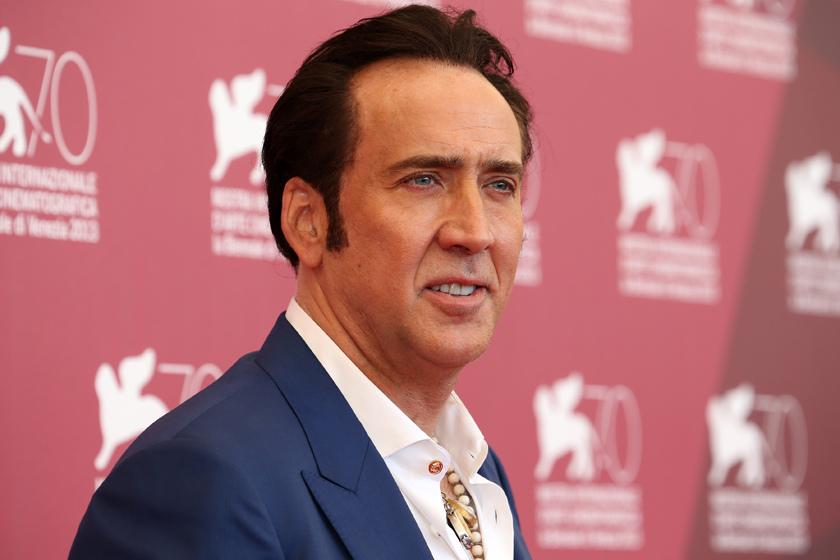

In [207]:
#Predictions

from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image
Path = r"/content/drive/MyDrive/Images/test/class1/Nic_Cage_150.jpg"
test_image = image.load_img(file, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result= model.predict(test_image)
train_set.class_indices
if result[0][0] == 1:

    print("This is the image of Nicolas Cage")
else:
    print("This is not the image of Nicolas Cage")



img = Image(Path, width = "400", height = "400")
display(img)
print("\n")
print("\n")

